<a href="https://colab.research.google.com/github/Shaheerr/Location_Detection/blob/main/CSI_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading GDrive and Install TF 

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount ('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#! pip install tensorflow==1.13

! python3 -c 'import tensorflow as tf; print(tf.__version__)'

# Data Preprocessing

In [ ]:
#List Sorted Data in a Directory
import pandas as pd
import numpy as np
import glob
import csv

for i in sorted(glob.glob("./drive/My Drive/Localization2/Dataset/Test/*")):
  print("input_file_name=",i )

In [ ]:
#Extract Rar file
!unrar e './drive/My Drive/Localization2/t2.rar' './drive/My Drive/Localization2/' 


In [ ]:
#Some values can become -inf which messes with the training
#Cleaning Data (Romoving rows where the value in -inf ie, less than -10)
#Do this for both test and Training Data (Change both i and outputfilename)

import pandas as pd
import numpy as np
import glob
import csv

for i in sorted(glob.glob("./drive/My Drive/Localization2/Dataset/Input/*")):
  print("input_file_name=",i )
  data = [[ float(elm) for elm in v] for v in csv.reader(open(i, "r"))]
  tmp1 = np.array(data)
  idx = np.where(tmp1 < -10)
  print(idx)
  tmp1 = np.delete(tmp1 , idx[0], axis = 0)
  
  outputfilename1 = i[0:39] + i[44:]
  with open(outputfilename1, "w") as f:
    print(outputfilename1)
    writer = csv.writer(f, lineterminator="\n")
    writer.writerows(tmp1)
    
  print(str(i) + " -------->> done")

In [ ]:
#Check shape of Data (Rows and colums)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
import pandas as pd
import numpy as np
import glob
import csv

count = 0
for i in sorted(glob.glob("./drive/My Drive/Localization2/Dataset/Input/*")):
  print("input_file_name=",i ) 
  data = [[ float(elm) for elm in v] for v in csv.reader(open(i, "r"))]
  tmp1 = np.array(data)
  print(tmp1.shape)

# Loading Data from Drive, divinding into test, train, val and Normalizing Data

In [ ]:
#Importing Training Data for classification
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
import pandas as pd
import numpy as np
import glob
import csv

ds = 50 #Downscaling factor
x = np.empty(shape = [0,90], dtype = float)
y = np.empty(shape = [0,15], dtype = float)
count = 0
persons = 3 #Number of Persons

p = 0;
for i in sorted(glob.glob("./drive/My Drive/Localization2/Dataset/Input/*")):
  print("input_file_name=",i ) 
  data = [[ float(elm) for elm in v] for v in csv.reader(open(i, "r"))]
  tmp1 = np.array(data)
  tmp1 = tmp1[:59200,1:91]
  tmp2 = tmp1[::ds,:]
  #r,c = np.shape(tmp1)
  x = np.concatenate((x,tmp2),axis = 0)
  r = tmp2.shape[0]
  
  yy = np.empty([r,15],float)
  if count == 0 :
      yy[:,:] = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
      print('Dome')
  elif count == 1:
     yy[:,:] = np.array([0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
  elif count == 2:
     yy[:,:] = np.array([0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
  elif count == 3:
     yy[:,:] = np.array([0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
  elif count == 4:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
  elif count == 5:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
  elif count == 6:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
  elif count == 7:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
  elif count == 8:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0])
  elif count == 9:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0])
  elif count == 10:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0])
  elif count == 11:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0])
  elif count == 12:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0])
  elif count == 13:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0])
  elif count == 14:
     yy[:,:] = np.array([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0])


  y = np.concatenate((y,yy),axis = 0)
  p = (p+1)%persons
  if p == 0:
    count = count + 1
  
  print(np.shape(x))
  print(np.shape(y))
  print(str(i) + " -------->> done")

In [ ]:
#Importing Training Data for Regression

import pandas as pd
import numpy as np
import glob
import csv

ds = 50 #Downsampling Factor
x = np.empty(shape = [0,90], dtype = float)
y = np.empty(shape = [0,2], dtype = float)
count = 0
persons = 3 #Number of Persons

p = 0;
for i in sorted(glob.glob("./drive/My Drive/Localization2/Dataset/Input/*")):
  print("input_file_name=",i ) 
  data = [[ float(elm) for elm in v] for v in csv.reader(open(i, "r"))]
  tmp1 = np.array(data)
  tmp1 = tmp1[:59200,1:91]
  tmp2 = tmp1[::ds,:]
  #r,c = np.shape(tmp1)
  x = np.concatenate((x,tmp2),axis = 0)
  r = tmp2.shape[0]
  
  yy = np.empty([r,2],float)
  if count == 0 :
     yy[:,:] = np.array([0.0,0.0])
  elif count == 1:
     yy[:,:] = np.array([0.0,0.9])
  elif count == 2:
     yy[:,:] = np.array([0.0,1.8])
  elif count == 3:
     yy[:,:] = np.array([0.9,0.0])
  elif count == 4:
     yy[:,:] = np.array([0.9,0.9])
  elif count == 5:
     yy[:,:] = np.array([0.9,1.8])
  elif count == 6:
     yy[:,:] = np.array([1.8,0.0])
  elif count == 7:
     yy[:,:] = np.array([1.8,0.9])
  elif count == 8:
     yy[:,:] = np.array([1.8,1.8])
  elif count == 9:
     yy[:,:] = np.array([2.7,0.0])
  elif count == 10:
     yy[:,:] = np.array([2.7,0.9])
  elif count == 11:
     yy[:,:] = np.array([2.7,1.8])
  elif count == 12:
     yy[:,:] = np.array([3.6,0.0])
  elif count == 13:
     yy[:,:] = np.array([3.6,0.9])
  elif count == 14:
     yy[:,:] = np.array([3.6,1.8])


  y = np.concatenate((y,yy),axis = 0)
  p = (p+1)%persons
  if p == 0:
    count = count + 1  
  print(np.shape(x))
  print(np.shape(y))
  print(str(i) + " -------->> done")

input_file_name= ./drive/My Drive/Localization2/Dataset/Input/csi_loc111.dat.csv
(1184, 90)
(1184, 2)
./drive/My Drive/Localization2/Dataset/Input/csi_loc111.dat.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Input/csi_loc112.dat.csv
(2368, 90)
(2368, 2)
./drive/My Drive/Localization2/Dataset/Input/csi_loc112.dat.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Input/csi_loc113.dat.csv
(3552, 90)
(3552, 2)
./drive/My Drive/Localization2/Dataset/Input/csi_loc113.dat.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Input/csi_loc121.dat.csv
(4736, 90)
(4736, 2)
./drive/My Drive/Localization2/Dataset/Input/csi_loc121.dat.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Input/csi_loc122.dat.csv
(5920, 90)
(5920, 2)
./drive/My Drive/Localization2/Dataset/Input/csi_loc122.dat.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Input/csi_loc123.dat.csv
(7104, 90

In [ ]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

loc = 9
n= 1184
plt.subplot(311)
plt.plot(x[loc*n:loc*n+10,:].T)
plt.subplot(312)
plt.plot(x[loc*2*n:loc*2*n+10,:].T)
plt.subplot(313)
plt.plot(x[loc*3*n:loc*3*n+10,:].T)

In [ ]:
#Importing Testing Data

import pandas as pd
import numpy as np
import glob
import csv

ds = 50 #Downsampling Factor
persons = 2
x_test1 = np.empty(shape = [0,90], dtype = float)
y_test1 = np.empty(shape = [0,2], dtype = float)

count = 0
p = 0
for i in sorted(glob.glob("./drive/My Drive/Localization2/Dataset/Test/*")):
  print("input_file_name=",i )
  data = [[ float(elm) for elm in v] for v in csv.reader(open(i, "r"))]
  tmp1 = np.array(data)
  tmp1 = tmp1[:59200,1:91]
  tmp2 = tmp1[::ds,:]
  #r,c = np.shape(tmp1)
  x_test1 = np.concatenate((x_test1,tmp2),axis = 0)
  r = tmp2.shape[0]
  yy = np.empty([r,2],float)
  
  
  if count == 0 :
      yy[:,:] = np.array([1.2,0.9])
      print('done')
  elif count == 1:
     yy[:,:] = np.array([1.8,1.5])
  elif count == 2:
     yy[:,:] = np.array([2.4,0.9])
  elif count == 3:
     yy[:,:] = np.array([1.8,0.3])
      
  y_test1 = np.concatenate((y_test1,yy),axis = 0)
  
  p = (p+1)%persons
  if p == 0:
    count = count + 1
  
  print(np.shape(x_test1))
  print(np.shape(y_test1))
  print(str(i) + " -------->> done")

input_file_name= ./drive/My Drive/Localization2/Dataset/Test/test11.dat.csv
done
(1184, 90)
(1184, 2)
./drive/My Drive/Localization2/Dataset/Test/test11.dat.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Test/test12.dat.csv
done
(2368, 90)
(2368, 2)
./drive/My Drive/Localization2/Dataset/Test/test12.dat.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Test/test21.dat.csv
(3552, 90)
(3552, 2)
./drive/My Drive/Localization2/Dataset/Test/test21.dat.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Test/test22.dat.csv
(4736, 90)
(4736, 2)
./drive/My Drive/Localization2/Dataset/Test/test22.dat.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Test/test31.dat.csv
(5920, 90)
(5920, 2)
./drive/My Drive/Localization2/Dataset/Test/test31.dat.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Test/test32.dat.csv
(7104, 90)
(7104, 2)
./drive/My Drive/Localization2/Da

In [ ]:
#Divide Data into Train , validation and Test Sets.
perm = np.arange(x.shape[0])
np.random.shuffle(perm)
x = x[perm]
y = y[perm]

train_idx = int(np.ceil(0.8 * x.shape[0]))
val_idx = int(np.ceil(0.9 * x.shape[0]))

x_train, x_val, x_test = x[:train_idx, ...], x[train_idx:val_idx:, ...], x[val_idx:, ...]
y_train, y_val, y_test = y[:train_idx, ...], y[train_idx:val_idx:, ...], y[val_idx:, ...]

#Save perm from drive (In case if training stops and you want to recover test and training split from drive)

outputfilename1 = "./drive/My Drive/Localization2/perm/perm.csv"
with open(outputfilename1, "w") as f:
  writer = csv.writer(f, lineterminator="\n")
  writer.writerows(map(lambda n: [n], perm))

In [ ]:
#Load perm from drive
f = "./drive/My Drive/Localization2/perm/perm.csv"
print("input_file_name=",f)
perm = np.array([[ int(elm) for elm in v] for v in csv.reader(open(f, "r"))])
perm = perm[:]
x = x[perm]
y = y[perm]

train_idx = int(np.ceil(0.8 * x.shape[0]))
val_idx = int(np.ceil(0.9 * x.shape[0]))

x_train, x_val, x_test = np.squeeze(x[:train_idx, ...]), np.squeeze(x[train_idx:val_idx:, ...]), np.squeeze(x[val_idx:, ...])
y_train, y_val, y_test = np.squeeze(y[:train_idx, ...]), np.squeeze(y[train_idx:val_idx:, ...]), np.squeeze(y[val_idx:, ...])

x_train = np.squeeze(x_train)
x_val = np.squeeze(x_val)
x_test = np.squeeze(x_test)

In [ ]:
#Normalizing Data from 0 to 1 range
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.MinMaxScaler()
scaler.fit(x_train) 

x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)
x_test1 = scaler.transform(x_test1)
print('Done')

Done


# Pre-training using AutoEncoder

In [ ]:
%env KERAS_BACKEND=theano
#%reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import keras
import keras.backend as K
from keras.layers import Input, Convolution2D, Activation, MaxPooling2D, \
     Dense, BatchNormalization, Dropout
from keras.layers.core import Flatten
from keras.optimizers import SGD
from keras.models import Model
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
from keras.layers.normalization import BatchNormalization

print(keras.__version__)
from subprocess import check_output

# Layer by layer pretraining Models

n1 = 120
n2 = 110
n3 = 100

# Layer 1
input_img = Input(shape = (90, ))
distorted_input1 = Dropout(.1)(input_img)
encoded1 = Dense(n1, activation = 'relu')(distorted_input1)
encoded1_bn = BatchNormalization()(encoded1)
decoded1 = Dense(90, activation = 'relu')(encoded1_bn)

autoencoder1 = Model(input = input_img, output = decoded1)
encoder1 = Model(input = input_img, output = encoded1_bn)

# Layer 2
encoded1_input = Input(shape = (n1,))
distorted_input2 = Dropout(.2)(encoded1_input)
encoded2 = Dense(n2, activation = 'relu')(distorted_input2)
encoded2_bn = BatchNormalization()(encoded2)
decoded2 = Dense(n1, activation = 'relu')(encoded2_bn)

autoencoder2 = Model(input = encoded1_input, output = decoded2)
encoder2 = Model(input = encoded1_input, output = encoded2_bn)

# Layer 3 
encoded2_input = Input(shape = (n2,))
distorted_input3 = Dropout(.3)(encoded2_input)
encoded3 = Dense(n3, activation = 'relu')(distorted_input3)
encoded3_bn = BatchNormalization()(encoded3)
decoded3 = Dense(n2, activation = 'relu')(encoded3_bn)

autoencoder3 = Model(input = encoded2_input, output = decoded3)
encoder3 = Model(input = encoded2_input, output = encoded3_bn)

sgd1 = SGD(lr = 5, decay = 0.5, momentum = .85, nesterov = True)
sgd2 = SGD(lr = 5, decay = 0.5, momentum = .85, nesterov = True)
sgd3 = SGD(lr = 0.5, decay = 0.5, momentum = .85, nesterov = True)

autoencoder1.compile(loss='mse', optimizer = sgd1)
autoencoder2.compile(loss='mse', optimizer = sgd2)
autoencoder3.compile(loss='mse', optimizer = sgd3)

encoder1.compile(loss='mse', optimizer = sgd1)
encoder2.compile(loss='mse', optimizer = sgd1)
encoder3.compile(loss='mse', optimizer = sgd1)


# What will happen to the learnning rates under this decay schedule?
lr = 5
for i in range(12):
    lr = lr - lr * .15
    print(lr)    

env: KERAS_BACKEND=theano


Using Theano backend.


2.2.4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=/input_1, outputs=Elemwise{m...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=/input_1, outputs=if{}.0)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=/input_2, outputs=Elemwise{m...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=/input_2, outputs=if{}.0)`


4.25
3.6125
3.0706249999999997
2.6100312499999996
2.2185265624999997
1.8857475781249997
1.60288544140625
1.3624526251953124
1.1580847314160156
0.9843720217036133
0.8367162184480713
0.7112087856808607


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=/input_3, outputs=Elemwise{m...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:57: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=/input_3, outputs=if{}.0)`


In [ ]:
autoencoder1.fit(x_train, x_train,
                nb_epoch = 100, batch_size = 1024,
                validation_split = 0.10,
                shuffle = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 38361 samples, validate on 4263 samples
Epoch 1/100
38361/38361 [==============================] - 1s 24us/step - loss: 0.0965 - val_loss: 0.7165
Epoch 2/100
38361/38361 [==============================] - 1s 24us/step - loss: 0.0168 - val_loss: 0.1444
Epoch 3/100
38361/38361 [==============================] - 1s 22us/step - loss: 0.0095 - val_loss: 0.0544
Epoch 4/100
38361/38361 [==============================] - 1s 22us/step - loss: 0.0075 - val_loss: 0.0247
Epoch 5/100
38361/38361 [==============================] - 1s 22us/step - loss: 0.0066 - val_loss: 0.0123
Epoch 6/100
38361/38361 [==============================] - 1s 22us/step - loss: 0.0064 - val_loss: 0.0071
Epoch 7/100
38361/38361 [==============================] - 1s 22us/step - loss: 0.0063 - val_loss: 0.0046
Epoch 8/100
38361/38361 [==============================] - 1s 22us/step - loss: 0.0062 - val_loss: 0.0035
Epoch 9/100
38361/38361 [==============================] - 1s 24us/step - loss: 0.0061 - val_loss: 0.00

In [ ]:
first_layer_code = encoder1.predict(x_train)
print(first_layer_code.shape)

(42624, 120)


In [ ]:
autoencoder2.fit(first_layer_code, first_layer_code,
                nb_epoch = 100, batch_size = 512,
                validation_split = 0.15,
                shuffle = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 36230 samples, validate on 6394 samples
Epoch 1/100
36230/36230 [==============================] - 1s 26us/step - loss: 0.2572 - val_loss: 0.2476
Epoch 2/100
36230/36230 [==============================] - 1s 26us/step - loss: 0.2084 - val_loss: 0.2102
Epoch 3/100
36230/36230 [==============================] - 1s 25us/step - loss: 0.2083 - val_loss: 0.2088
Epoch 4/100
36230/36230 [==============================] - 1s 25us/step - loss: 0.2080 - val_loss: 0.2084
Epoch 5/100
36230/36230 [==============================] - 1s 25us/step - loss: 0.2075 - val_loss: 0.2076
Epoch 6/100
36230/36230 [==============================] - 1s 26us/step - loss: 0.2066 - val_loss: 0.2067
Epoch 7/100
36230/36230 [==============================] - 1s 26us/step - loss: 0.2057 - val_loss: 0.2061
Epoch 8/100
36230/36230 [==============================] - 1s 29us/step - loss: 0.2054 - val_loss: 0.2061
Epoch 9/100
36230/36230 [==============================] - 1s 29us/step - loss: 0.2054 - val_loss: 0.20

In [ ]:
second_layer_code = encoder2.predict(first_layer_code)
print(second_layer_code.shape)

(42624, 110)


In [ ]:
autoencoder3.fit(second_layer_code, second_layer_code,
                nb_epoch = 100, batch_size = 512,
                validation_split = 0.10,
                shuffle = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 38361 samples, validate on 4263 samples
Epoch 1/100
38361/38361 [==============================] - 1s 24us/step - loss: 1.8405 - val_loss: 1.7735
Epoch 2/100
38361/38361 [==============================] - 1s 24us/step - loss: 1.6278 - val_loss: 1.5533
Epoch 3/100
38361/38361 [==============================] - 1s 24us/step - loss: 1.5784 - val_loss: 1.4898
Epoch 4/100
38361/38361 [==============================] - 1s 25us/step - loss: 1.5518 - val_loss: 1.4628
Epoch 5/100
38361/38361 [==============================] - 1s 24us/step - loss: 1.5330 - val_loss: 1.4480
Epoch 6/100
38361/38361 [==============================] - 1s 23us/step - loss: 1.5182 - val_loss: 1.4372
Epoch 7/100
38361/38361 [==============================] - 1s 24us/step - loss: 1.5078 - val_loss: 1.4284
Epoch 8/100
38361/38361 [==============================] - 1s 24us/step - loss: 1.4983 - val_loss: 1.4214
Epoch 9/100
38361/38361 [==============================] - 1s 24us/step - loss: 1.4905 - val_loss: 1.41

In [ ]:
#Save autoencoder weights after training
autoencoder1.save('./drive/My Drive/Localization2/keras_models/15-loc-1/a1-10hz-2p.h5')
autoencoder2.save('./drive/My Drive/Localization2/keras_models/15-loc-1/a2-10hz-2p.h5')
autoencoder3.save('./drive/My Drive/Localization2/keras_models/15-loc-1/a3-10hz-2p.h5')

In [ ]:
#Load autoencoder weights
autoencoder1.load_weights('./drive/My Drive/Localization2/keras_models/15-loc-1/a1-10hz-2p.h5')
autoencoder2.load_weights('./drive/My Drive/Localization2/keras_models/15-loc-1/a2-10hz-2p.h5')
autoencoder3.load_weights('./drive/My Drive/Localization2/keras_models/15-loc-1/a3-10hz-2p.h5')

# Defining Models for Classification and Regression (with AutoEncoder)

In [ ]:
#Machine Learning Model for classification
#Plot Loss
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Flatten, Dense, Activation


import tensorflow as tf
import pandas as pd
import glob
import os

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM,Dropout,Conv2D
from tensorflow.python.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Flatten,MaxPooling2D,AveragePooling2D
from keras import metrics
from keras import optimizers



class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()


class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
       
    def on_train_batch_begin(self, batch, logs=None):
      {}

    def on_train_batch_end(self, batch, logs=None):
      {}

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()



class AvgError(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_train_batch_begin(self, batch, logs=None):
      {}

    def on_train_batch_end(self, batch, logs=None):
      {}
      
    def on_epoch_end(self, epoch, logs={}):
        x_test, y_test = self.test_data
        #loss, acc = self.model.evaluate(x, y, verbose=0)
        k = 24
        pred = np.array(self.model.predict(x_test,verbose = 0))
        top_k_idx = pred.argsort(axis = 1)[:,-1*k:][:,::-1]
        top_k_preds = np.empty([pred.shape[0],k])

        for k in range(pred.shape[0]):
          top_k_preds[k] = pred[k,:][top_k_idx[k,:]]


        cord = np.array([[0.0,0.0],[0.0,0.6],[0.0,1.2],[0.0,1.8],[0.0,2.4],[0.0,3.0],[0.0,3.6],[0.0,4.2],[0.6,0.0],[0.6,0.6],[0.6,1.2],[0.6,1.8],[0.6,2.4],[0.6,3.0],[0.6,3.6],[0.6,4.2],
                        [1.2,0.0],[1.2,0.6],[1.2,1.2],[1.2,1.8],[1.2,2.4],[1.2,3.0],[1.2,3.6],[1.2,4.2]])
        
#        cord = np.array([[0.334,0.0],[2.334,0.0],[4.334,0.0],[6.334,0.0],[8.334,0.0],[8.0,2.334],[8.0,4.334],[6.0,4.334],[4.0,4.334],[2.0,4.334],[0.0,4.334],[0.0,1.666]])        
        
        top_locs = np.empty([pred.shape[0],2])
        for k in range(pred.shape[0]):
          top_locs[k,:] = np.sum(cord[top_k_idx[k,:],:] * top_k_preds[k,:][:,np.newaxis], axis = 0)

        #act_locs = y_test
        act_idx = y.argmax(axis = 1)
        #act_cords = np.array([[0.334,0.0],[2.334,0.0],[4.334,0.0],[6.334,0.0],[8.0,0.334],[8.0,2.334],[7.666,4.0],[5.666,4.0],[3.666,4.0],[1.666,4.0],[0.0,3.666],[0.0,1.666]])
        
        act_locs = np.empty([pred.shape[0],2])
        act_locs = y_test
        
        
        dists = np.sqrt(np.sum(np.square(top_locs - act_locs),axis = 1))
        avg_error = np.mean(dists)
        print('Average mse = : {}'.format(avg_error))
        
        n = top_locs.shape[0]

        g1 = (top_locs[0:int(n/5),0], top_locs[0:int(n/5),1]) 
        g2 = (top_locs[int(n/5):int(2*n/5),0], top_locs[int(n/5):int(2*n/5),1]) 
        g3 = (top_locs[int(2*n/5):int(3*n/5),0], top_locs[int(2*n/5):int(3*n/5),1]) 
        g4 = (top_locs[int(3*n/5):int(4*n/5),0], top_locs[int(3*n/5):int(4*n/5),1]) 
        g5 = (top_locs[int(4*n/5):int(n),0], top_locs[int(4*n/5):int(n),1]) 
        data = (g1,g2,g3,g4,g5)
        colors = ('red','green','blue','brown','black')
        for data, color in zip(data, colors):
          d1, d2 = data
          plt.scatter(np.mean(d1), np.mean(d2), alpha=0.8, c=color, edgecolors='none', s=30)
          #plt.scatter(d1, d2, alpha=0.8, c=color, edgecolors='none', s=30)

        plt.scatter([0.3,0.9,0.3,0.9,0.3],[0.9,1.5,2.1,2.7,3.3], color = 'purple')

        plt.title('Scatter plot')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()


#Machine Learning Model for TPU#######################################################################
%matplotlib inline
print(keras.__version__)

model = Sequential()


model.add(Dense(64, input_shape =(90,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(15, activation='softmax'))


optimizer=tf.train.AdamOptimizer(learning_rate=0.0001)
#optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#Machine Learning Model for TPU#######################################################################


model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])



model.layers[0].set_weights(autoencoder1.layers[2].get_weights())
model.layers[1].set_weights(autoencoder1.layers[3].get_weights())
model.layers[2].set_weights(autoencoder2.layers[2].get_weights())
model.layers[3].set_weights(autoencoder2.layers[3].get_weights())
model.layers[4].set_weights(autoencoder3.layers[2].get_weights())
model.layers[5].set_weights(autoencoder3.layers[3].get_weights())

model_json = model.to_json()
with open("./drive/My Drive/Localization/keras_models/24-loc-2/model.json", "w") as json_file:
    json_file.write(model_json)
    
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

tpu_model.summary()
#mc = keras.callbacks.ModelCheckpoint('./drive/My Drive/Localization/keras_models/5-loc-1/weights{epoch:08d}.h5', 
#                                     save_weights_only=True, period=50)

#tpu_model.reset_states()
#tpu_model.load_weights('./drive/My Drive/Localization/keras_models/24-loc-2/model{epoch:08d}.h5')

history = tpu_model.fit(x_train, y_train,
                          epochs=2000,
                          batch_size=1280,
                          validation_data  = [x_val, y_val] , shuffle = True, callbacks=[plot, AvgError([x_test1,y_test1])])
tpu_model.save('./drive/My Drive/Localization/keras_models/24-loc-2/model{epoch:08d}-1.h5', overwrite=True)

    

In [ ]:
#Machine Learning Model for Regression
#Plot Loss
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Flatten, Dense, Activation
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import tensorflow as tf
import pandas as pd
import glob
import os

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM,Dropout,Conv2D
from tensorflow.python.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Flatten,MaxPooling2D,AveragePooling2D
from keras import metrics
from keras import optimizers



class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()


class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
       
    def on_train_batch_begin(self, batch, logs=None):
      {}

    def on_train_batch_end(self, batch, logs=None):
      {}

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()



class AvgError(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_train_batch_begin(self, batch, logs=None):
      {}

    def on_train_batch_end(self, batch, logs=None):
      {}
      
    def on_epoch_end(self, epoch, logs={}):
        p = 6
        x_test, y_test = self.test_data
        top_locs = tpu_model.predict(x_test)
        act_locs = np.empty([top_locs.shape[0],2])
        act_locs = y_test
        
        sq = np.square(top_locs - act_locs)
        avg_error = np.mean(np.sqrt(sq[:,0] + sq[:,1]))
        print('Average mse = : {}'.format(avg_error))
        
        n = top_locs.shape[0]

        for i in range(p):
          plt.scatter(np.mean(top_locs[int(i * n/p):int((i+1) * n/p),0]), np.mean(top_locs[int(i * n/p):int((i+1) * n/p),1]))
          #plt.scatter(top_locs[int(i * n/p):int((i+1) * n/p),0], top_locs[int(i * n/p):int((i+1) * n/p),1])
        plt.scatter([1.2,1.8,2.4,1.8],[0.9,1.5,0.9,0.3], color = 'purple')
        plt.axis((-1,4,-0.5,2.5))


        plt.title('Scatter plot')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()


def on_train_batch_begin(self, batch, logs=None):
      {}

def on_train_batch_end(self, batch, logs=None):
      {}
    
ReduceLROnPlateau.on_train_batch_begin = on_train_batch_begin
ReduceLROnPlateau.on_train_batch_end = on_train_batch_end

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.000001, verbose = 1)


#Machine Learning Model for TPU#######################################################################
%matplotlib inline
print(keras.__version__)

model = Sequential()

#model.add(BatchNormalization(input_shape=(90,30,3)))
#model.add(Conv2D(10, kernel_size=1, activation='relu'))
#model.add(Dropout(0.4))
#model.add(AveragePooling2D(pool_size=2))

#model.add(Conv2D(16, kernel_size=3, activation='relu'))
#model.add(Dropout(0.4))
#model.add(AveragePooling2D(pool_size=2))

#model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(Dropout(0.4))
#model.add(AveragePooling2D(pool_size=2))

#model.add(Conv2D(64, kernel_size=3, activation='relu'))
#model.add(Dropout(0.4))
#model.add(AveragePooling2D(pool_size=2))

#model.add(Conv2D(256, kernel_size=3, activation='relu', padding = 'same'))
#model.add(Dropout(0.4))
#model.add(AveragePooling2D(pool_size=2))

#model.add(Flatten())

model.add(Dense(64, input_shape =(90,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(2, activation='linear'))


#optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = tf.keras.optimizers.Adam(lr=0.01)

#optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#Machine Learning Model for TPU#######################################################################


model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['accuracy'])



model.layers[0].set_weights(autoencoder1.layers[2].get_weights())
model.layers[1].set_weights(autoencoder1.layers[3].get_weights())
model.layers[3].set_weights(autoencoder2.layers[2].get_weights())
model.layers[4].set_weights(autoencoder2.layers[3].get_weights())
model.layers[6].set_weights(autoencoder3.layers[2].get_weights())
model.layers[7].set_weights(autoencoder3.layers[3].get_weights())

model_json = model.to_json()
with open("./drive/My Drive/Localization2/keras_models/15-loc-1/model.json", "w") as json_file:
    json_file.write(model_json)
    
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

tpu_model = tf.contrib. tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

tpu_model.summary()
#mc = keras.callbacks.ModelCheckpoint('./drive/My Drive/Localization/keras_models/5-loc-1/weights{epoch:08d}.h5', 
#                                     save_weights_only=True, period=50)

#tpu_model.reset_states()
#tpu_model.load_weights('./drive/My Drive/Localization/keras_models/24-loc-2/model{epoch:08d}.h5')

history = tpu_model.fit(x_train, y_train,
                          epochs=1000,
                          batch_size=1280,
                          validation_data  = [x_val,y_val] , shuffle = True, callbacks=[plot, reduce_lr , AvgError([x_test1,y_test1])])
tpu_model.save('./drive/My Drive/Localization/keras_models/24-loc-2/model{epoch:08d}-1.h5', overwrite=True)

    

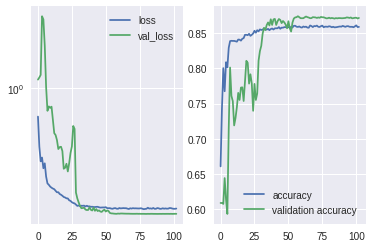

In [ ]:
#@title
#Machine Learning Model for Combining Classification and then Regression
#Plot Loss
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Flatten, Dense, Activation
from tensorflow.python.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import tensorflow as tf
import pandas as pd
import glob
import os

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM,Dropout,Conv2D
from tensorflow.python.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.layers import BatchNormalization, Lambda
from tensorflow.python.keras.layers import Flatten,MaxPooling2D,AveragePooling2D
from keras import metrics
from keras import optimizers
from keras import backend as K


class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()


class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
       
    def on_train_batch_begin(self, batch, logs=None):
      {}

    def on_train_batch_end(self, batch, logs=None):
      {}

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()


class AvgError(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_train_batch_begin(self, batch, logs=None):
      {}

    def on_train_batch_end(self, batch, logs=None):
      {}
      
    def on_epoch_end(self, epoch, logs={}):
        p = 6
        x_test, y_test = self.test_data
        top_locs = tpu_model.predict(x_test)
        act_locs = np.empty([top_locs.shape[0],2])
        act_locs = y_test
        
        sq = np.square(top_locs - act_locs)
        avg_error = np.mean(np.sqrt(sq[:,0] + sq[:,1]))
        print('Average mse = : {}'.format(avg_error))
        
        n = top_locs.shape[0]

        for i in range(p):
          plt.scatter(np.mean(top_locs[int(i * n/p):int((i+1) * n/p),0]), np.mean(top_locs[int(i * n/p):int((i+1) * n/p),1]))
#        plt.scatter(top_locs[int(i * n/p):int((i+1) * n/p),0], top_locs[int(n/2):,1])
        plt.scatter([1.2,1.8,2.4,1.8],[0.9,1.5,0.9,0.3], color = 'purple')
        plt.axis((-1,4,-0.5,2.5))


        plt.title('Scatter plot')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()



def on_train_batch_begin(self, batch, logs=None):
      {}

def on_train_batch_end(self, batch, logs=None):
      {}
    
ReduceLROnPlateau.on_train_batch_begin = on_train_batch_begin
ReduceLROnPlateau.on_train_batch_end = on_train_batch_end

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.000001, verbose = 1)


#Machine Learning Model for TPU#######################################################################
%matplotlib inline
print(keras.__version__)

model = Sequential()


model.add(Dense(64, input_shape =(90,), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#model.add(Dense(16, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))


model.add(Dense(15, activation='softmax'))

model.add(Lambda(softmax2coord,
                 output_shape=softmax2coord_output_shape))

#optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimizer = tf.keras.optimizers.Adam(lr=0.01)

#optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#Machine Learning Model for TPU#######################################################################


model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['accuracy'])



#model.layers[0].set_weights(autoencoder1.layers[2].get_weights())
#model.layers[1].set_weights(autoencoder1.layers[3].get_weights())
#model.layers[3].set_weights(autoencoder2.layers[2].get_weights())
#model.layers[4].set_weights(autoencoder2.layers[3].get_weights())
#model.layers[6].set_weights(autoencoder3.layers[2].get_weights())
#model.layers[7].set_weights(autoencoder3.layers[3].get_weights())

model_json = model.to_json()
with open("./drive/My Drive/Localization2/keras_models/15-loc-1/model.json", "w") as json_file:
    json_file.write(model_json)
    
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

tpu_model = tf.contrib. tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

tpu_model.summary()
#mc = keras.callbacks.ModelCheckpoint('./drive/My Drive/Localization/keras_models/5-loc-1/weights{epoch:08d}.h5', 
#                                     save_weights_only=True, period=50)

#tpu_model.reset_states()
#tpu_model.load_weights('./drive/My Drive/Localization/keras_models/24-loc-2/model{epoch:08d}.h5')

history = tpu_model.fit(x_train, y_train,
                          epochs=1000,
                          batch_size=1280,
                          validation_data  = [x_val,y_val] , shuffle = True, callbacks=[plot, reduce_lr , AvgError([x_test1,y_test1])])
tpu_model.save('./drive/My Drive/Localization/keras_models/24-loc-2/model{epoch:08d}-1.h5', overwrite=True)

    

In [ ]:
import keras.backend as K
import tensorflow as tf
def softmax2coord(pred):
  cord = tf.convert_to_tensor(np.array([[0.0,0.0],[0.0,0.9],[0.0,1.8],[0.9,0.0],[0.9,0.9],[0.9,1.8],[1.8,0.0],[1.8,0.9],[1.8,1.8],[2.7,0.0],[2.7,0.9],[2.7,1.8],
                    [3.6,0.0],[3.6,0.9],[3.6,1.8]]) , dtype=np.float32)

  t1 = K.dot(pred , K.expand_dims(cord[:,0], axis = 1))
  t2 = K.dot(pred , K.expand_dims(cord[:,1], axis = 1))

  return K.concatenate([t1,t2], axis = 1)
  
def softmax2coord_output_shape(input_shape):
  shape = list(input_shape)
  shape[-1] = 2
  return tuple(shape)



Using TensorFlow backend.


In [ ]:
import tensorflow as tf

def softmax2coord_tf(pred):
  return tf.py_func(softmax2coord, [pred], [tf.float32])
  pred = np.array(pred)

def softmax2coord(pred):
  cord = np.array([[0.0,0.0],[0.0,0.9],[0.0,1.8],[0.9,0.0],[0.9,0.9],[0.9,1.8],[1.8,0.0],[1.8,0.9],[1.8,1.8],[2.7,0.0],[2.7,0.9],[2.7,1.8],
                        [3.6,0.0],[3.6,0.9],[3.6,1.8]])
  
  top_locs = np.empty([pred.shape[0],2])
  for k in range(pred.shape[0]):
    top_locs[k,:] = np.sum(cord[top_k_idx[k,:],:] * top_k_preds[k,:][:,np.newaxis], axis=0)
  return top_locs

def softmax2coord_output_shape(input_shape):
  shape = list(input_shape)
  shape[-1] = 2
  return tuple(shape)

# Defining Models for Classification and Regression (without AutoEncoder)

In [ ]:
#Machine Learning Model for Classification
#Plot Loss
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation


import tensorflow as tf
import pandas as pd
import glob
import os

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM,Dropout,Conv2D
from tensorflow.python.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Flatten,MaxPooling2D,AveragePooling2D
from keras import metrics
from keras import optimizers



class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()


class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
       
    def on_train_batch_begin(self, batch, logs=None):
      {}

    def on_train_batch_end(self, batch, logs=None):
      {}

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()


class AvgError(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_train_batch_begin(self, batch, logs=None):
      {}

    def on_train_batch_end(self, batch, logs=None):
      {}
      
    def on_epoch_end(self, epoch, logs={}):
        x_test, y_test = self.test_data
        #loss, acc = self.model.evaluate(x, y, verbose=0)
        k = 15
        pred = np.array(self.model.predict(x_test,verbose = 0))
        top_k_idx = pred.argsort(axis = 1)[:,-1*k:][:,::-1]
        top_k_preds = np.empty([pred.shape[0],k])

        for k in range(pred.shape[0]):
          top_k_preds[k] = pred[k,:][top_k_idx[k,:]]

#        for k in range(pred.shape[0]):
#          top_k_preds[k,:] = np.exp(top_k_preds[k,:]) / np.sum(np.exp(top_k_preds[k,:]))

        cord = np.array([[0.0,0.0],[0.0,0.9],[0.0,1.8],[0.9,0.0],[0.9,0.9],[0.9,1.8],[1.8,0.0],[1.8,0.9],[1.8,1.8],[2.7,0.0],[2.7,0.9],[2.7,1.8],[3.6,0.0],[3.6,0.9],[3.6,1.8]])
        
#        cord = np.array([[0.334,0.0],[2.334,0.0],[4.334,0.0],[6.334,0.0],[8.334,0.0],[8.0,2.334],[8.0,4.334],[6.0,4.334],[4.0,4.334],[2.0,4.334],[0.0,4.334],[0.0,1.666]])        
        
        top_locs = np.empty([pred.shape[0],2])
        for k in range(pred.shape[0]):
          top_locs[k,:] = np.sum(cord[top_k_idx[k,:],:] * top_k_preds[k,:][:,np.newaxis], axis = 0)

        #act_locs = y_test
        act_idx = y.argmax(axis = 1)
        #act_cords = np.array([[0.334,0.0],[2.334,0.0],[4.334,0.0],[6.334,0.0],[8.0,0.334],[8.0,2.334],[7.666,4.0],[5.666,4.0],[3.666,4.0],[1.666,4.0],[0.0,3.666],[0.0,1.666]])
        act_cords = np.array([[0.0,0.0],[0.0,0.6],[0.0,1.2],[0.0,1.8],[0.0,2.4],[0.0,3.0],[0.0,3.6],[0.0,4.2],[0.6,0.0],[0.6,0.6],[0.6,1.2],[0.6,1.8],[0.6,2.4],[0.6,3.0],[0.6,3.6],[0.6,4.2],
                        [1.2,0.0],[1.2,0.6],[1.2,1.2],[1.2,1.8],[1.2,2.4],[1.2,3.0],[1.2,3.6],[1.2,4.2]])
        act_locs = np.empty([pred.shape[0],2])

        for k in range(pred.shape[0]):
          act_locs[k,:] = act_cords[act_idx[k],:]
        
        
        dists = np.sqrt(np.sum(np.square(top_locs - act_locs),axis = 1))
        avg_error = np.mean(dists)
        print('Average mse = : {}'.format(avg_error))
        
        d1, d2 = top_locs[:,0],top_locs[:,1]
        plt.scatter(d1, d2, alpha=0.8, edgecolors='none', s=30)

        plt.title('Scatter plot')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()


#Machine Learning Model for TPU
%matplotlib inline
print(keras.__version__)

model = Sequential()
#model.add(BatchNormalization(input_shape=(30,30,3)))
#model.add(Conv2D(10, kernel_size=1, activation='relu',input_shape=(30,30,3)))
#model.add(AveragePooling2D(pool_size=2))
#model.add(Conv2D(16, kernel_size=3, activation='relu'))
#model.add(AveragePooling2D(pool_size=2))
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
#model.add(AveragePooling2D(pool_size=2, padding = 'same'))
#model.add(Conv2D(16, kernel_size=3, activation='relu'))
#model.add(AvberagePooling2D(pool_size=2, padding = 'same'))
#model.add(Flatten())

model.add(Dense(160, input_shape=(90,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(140, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(15, activation='softmax'))

optimizer=tf.train.AdamOptimizer(learning_rate=0.0001)
#optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model_json = model.to_json()
with open("./drive/My Drive/Localization2/keras_models/15-loc-1/model.json", "w") as json_file:
    json_file.write(model_json)
    
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

tpu_model.summary()
#mc = keras.callbacks.ModelCheckpoint('./drive/My Drive/Localization2/keras_models/5-loc-1/weights{epoch:08d}.h5', 
#                                     save_weights_only=True, period=50)


#tpu_model.load_weights('./drive/My Drive/WifiActivityRecognition/keras_models/8-activity-4/weights00001150.h5')

history = tpu_model.fit(x_train, y_train,
                          epochs=2000,
                          batch_size=1024,
                          validation_data  = [x_val,y_val] , shuffle = True, callbacks=[plot, AvgError([x_test1,y_test1])])
tpu_model.save('./drive/My Drive/Localization/keras_models/24-loc-1/model{epoch:08d}.h5', overwrite=True)

    

In [ ]:
#Machine Learning Model for Regression
#Plot Loss
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Flatten, Dense, Activation


import tensorflow as tf
import pandas as pd
import glob
import os

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM,Dropout,Conv2D
from tensorflow.python.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Flatten,MaxPooling2D,AveragePooling2D
from keras import metrics
from keras import optimizers



class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()


class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []
       
    def on_train_batch_begin(self, batch, logs=None):
      {}

    def on_train_batch_end(self, batch, logs=None):
      {}

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()



class AvgError(keras.callbacks.Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_train_batch_begin(self, batch, logs=None):
      {}

    def on_train_batch_end(self, batch, logs=None):
      {}
      
    def on_epoch_end(self, epoch, logs={}):
        x_test, y_test = self.test_data
        top_locs = tpu_model.predict(x_test)
        act_locs = np.empty([top_locs.shape[0],2])
        act_locs = y_test
        
        dists = np.sqrt(np.sum(np.square(top_locs - act_locs),axis = 1))
        avg_error = np.mean(dists)
        print('Average mae = : {}'.format(avg_error))
        
        n = top_locs.shape[0]

        plt.scatter(top_locs[:,0],top_locs[:,1])

        plt.title('Scatter plot')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()


#Machine Learning Model for TPU#######################################################################
%matplotlib inline
print(keras.__version__)

model = Sequential()

model.add(BatchNormalization(input_shape=(25,30,3)))
model.add(Conv2D(10, kernel_size=1, activation='relu'))
model.add(Dropout(0.4))
#model.add(AveragePooling2D(pool_size=2))

model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Dropout(0.4))
#model.add(AveragePooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Dropout(0.4))
#model.add(AveragePooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Dropout(0.4))
#model.add(AveragePooling2D(pool_size=2))

model.add(Conv2D(128, kernel_size=3, activation='relu', padding = 'same'))
model.add(Dropout(0.4))
#model.add(AveragePooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(512, input_shape =(90,), activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.3))

#model.add(Dense(150, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))

#model.add(Dense(140, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))

model.add(Dense(2, activation='linear'))


optimizer=tf.train.AdamOptimizer(learning_rate=0.001)
#optimizer = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#Machine Learning Model for TPU#######################################################################


model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['accuracy'])


model_json = model.to_json()
with open("./drive/My Drive/Localization2/keras_models/15-loc-1/model.json", "w") as json_file:
    json_file.write(model_json)
    
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))

tpu_model.summary()
#mc = keras.callbacks.ModelCheckpoint('./drive/My Drive/Localization/keras_models/5-loc-1/weights{epoch:08d}.h5', 
#                                     save_weights_only=True, period=50)

#tpu_model.reset_states()
#tpu_model.load_weights('./drive/My Drive/Localization/keras_models/24-loc-2/model{epoch:08d}.h5')

history = tpu_model.fit(x_train, y_train,
                          epochs=2000,
                          batch_size=1280,
                          validation_data  = [x_val,y_val] , shuffle = True, callbacks=[plot, AvgError([x_test1,y_test1])])
tpu_model.save('./drive/My Drive/Localization/keras_models/24-loc-2/model{epoch:08d}-1.h5', overwrite=True)

    

# Extra Code

In [ ]:
#Convert Data into Images for CNN
def data_convert(x,y):
  t = 25
  x_conv = np.empty([0,t,30,3])
  #tmp = np.empty([0,t,30,3])
  n = x.shape[0]
  n = n - n%t
 
  for k in range(int(n/t)):
    r = x[int(k*t):int((k+1)*t),0:30]
    g = x[int(k*t):int((k+1)*t),30:60]
    b = x[int(k*t):int((k+1)*t),60:90]

    tmp = np.dstack((r,g,b))
    tmp = np.expand_dims(tmp, axis = 0)
    x_conv = np.concatenate((x_conv,tmp), axis = 0)
  y_conv = y[::t,:]
  
  if y_conv.shape[0] != x_conv.shape[0]:
    y_conv = y_conv[:x_conv.shape[0],:]
  print('Done')
  return x_conv,y_conv


x_train,y_train = data_convert(x_train,y_train)
x_val,y_val = data_convert(x_val,y_val)
x_test,y_test = data_convert(x_test,y_test)
x_test1, y_test1 = data_convert(x_test1,y_test1)

n = x_test1.shape[0]
n = n - n%8
x_test1 = x_test1[:n,:]
y_test1 = y_test1[:n,:]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)
print(x_test1.shape)
print(y_test1.shape)

In [ ]:
#Convert data into collection of r samples
def data_convert(x,y):
  r = 90
  x_conv = np.empty([0,r,90])
  n = x.shape[0]
  n = n - n%r
  for k in range(int(n/r)):
    
    tmp = x[k*r:(k+1)*r,:]
    tmp = np.expand_dims(tmp, axis=0)
    x_conv = np.concatenate((x_conv,tmp),axis = 0)
    y_conv = y[::r,:]
  return x_conv,y_conv


x,y = data_convert(x,y)
x_test1, y_test1 = data_convert(x_test1,y_test1)

In [ ]:
#Reduce Dimentionality using AutoEncoder
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers

input_dim = x_train.shape[1]
encoding_dim = 5

autoencoder = Sequential()
autoencoder.add(Dense(50, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(30, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(10, input_shape=(input_dim,), activation='relu'))

autoencoder.add(Dense(encoding_dim, activation='relu'))

autoencoder.add(Dense(10, activation='relu'))
autoencoder.add(Dense(30, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(50, input_shape=(input_dim,), activation='relu'))

autoencoder.add(Dense(input_dim, activation='sigmoid'))
autoencoder.summary()
optimizer=tf.train.AdamOptimizer(learning_rate=0.001)

autoencoder.compile(optimizer=optimizer, loss='mse')
autoencoder.load_weights('./drive/My Drive/Localization/keras_models/autoencoderlinear100hz.h5')
autoencoder.fit(x_train, x_train,
                epochs=1000,
                batch_size=1280,
                shuffle=True,
                validation_data=(x_test, x_test))

autoencoder.save('./drive/My Drive/Localization/keras_models/autoencoderlinear100hz-1.h5')



In [ ]:
from keras.models import load_model
autoencoder = load_model('./drive/My Drive/Localization/keras_models/autoencoder20hz-1.h5')

In [ ]:
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers


input_dim = 90
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder_layer4 = autoencoder.layers[3]
encoder = Model(input_img, encoder_layer4(encoder_layer3(encoder_layer2(encoder_layer1(input_img)))))

encoded_x = encoder.predict(x)
encoded_x_test1 = encoder.predict(x_test1)


In [ ]:
#Use T-SNE on data to reduce dimension for visualization
import time

from sklearn.manifold import TSNE

n_sne = .9216

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(x)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

i = 4
n = 384
plt.scatter(tsne_results[i*n:i*n + n,0], tsne_results[i*n:i*n + n,1])
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#Print Confusion Matrix
from mlxtend.evaluate import confusion_matrix

pred = tpu_model.predict(x)
cm = confusion_matrix(y_target=np.argmax(y,1),y_predicted=np.argmax(pred,1),binary=False)
cm

In [ ]:
#Import Waqai Test Data
#Importing Testing Data

import pandas as pd
import numpy as np
import glob
import csv
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np


ds = 50 #Downsampling Factor

x_test2 = np.empty(shape = [0,90], dtype = float)
y_test2 = np.empty(shape = [0,2], dtype = float)

count = 0

for i in sorted(glob.glob("./drive/My Drive/Localization2/Dataset/Test2/*")):
  print("input_file_name=",i )
  data = [[ float(elm) for elm in v] for v in csv.reader(open(i, "r"))]
  tmp1 = np.array(data)
  tmp1 = tmp1[:59200,1:91]
  tmp2 = tmp1[::ds,:]
  #r,c = np.shape(tmp1)
  x_test2 = np.concatenate((x_test2,tmp2),axis = 0)
  r = tmp2.shape[0]
  yy = np.empty([r,2],float)
  
  
  if count == 0 :
     yy[:,:] = np.array([0.6,0.0]) 
  elif count == 1:
     yy[:,:] = np.array([1.2,0.0])
  elif count == 2:
     yy[:,:] = np.array([0.0,0.0])
      
  y_test2 = np.concatenate((y_test2,yy),axis = 0)
  
  count = count + 1
  
  
  
  print(np.shape(x_test2))
  print(np.shape(y_test2))
  print(str(i) + " -------->> done")
  
#Normalizing Data from 0 to 1 range
x_test2 = scaler.transform(x_test2)
x_test1 = np.concatenate((x_test1,x_test2),axis = 0)
y_test1 = np.concatenate((y_test1,y_test2),axis = 0) 

input_file_name= ./drive/My Drive/Localization2/Dataset/Test2/test1.csv
(1184, 90)
(1184, 2)
./drive/My Drive/Localization2/Dataset/Test2/test1.csv -------->> done
input_file_name= ./drive/My Drive/Localization2/Dataset/Test2/test2.csv
(2368, 90)
(2368, 2)
./drive/My Drive/Localization2/Dataset/Test2/test2.csv -------->> done


In [ ]:
#Testing Model on Waqai Test Data
p = 2
top_locs = tpu_model.predict(x_test2)
act_locs = np.empty([top_locs.shape[0],2])
act_locs = y_test2

dists = np.sqrt(np.sum(np.square(top_locs - act_locs),axis = 1))
avg_error = np.mean(dists)
print('Average mse = : {}'.format(avg_error))

n = top_locs.shape[0]

for i in range(p):
  plt.scatter(np.mean(top_locs[int(i * n/p):int((i+1) * n/p),0]), np.mean(top_locs[int(n/2):,1]))

plt.scatter([0.6,1.2],[0.0,0.0], color = 'purple')
plt.axis((-1,4,-0.5,2.5))


plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')